In [7]:
!pip install psycopg2 sqlalchemy

In [31]:
# Import depedencies

# SQL Alchemy
from sqlalchemy import create_engine

#Psycopg2
import psycopg2

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# NumPy
import numpy as np


In [30]:
engine = create_engine(
   #INSERT F STRING HERE (username, password, and db_name has ommited for secruity)
    f"postgresql+psycopg2://USERNAME: INSERT PASSWORD @/DB_NAME?localhost:5432"
)
conn = engine.connect()

In [33]:
# Reading in our data from tables
# Check out pgadmin databases for salary for employees and titles

salary = pd.read_sql(
                "select e.emp_no, \
                  first_name, \
                  last_name, \
                  salary, \
                  title, \
                  dept_name \
                from employees e join dept_emp de on e.emp_no = de.emp_no \
                  join departments d on d.dept_no = de.dept_no \
                  join salaries s on s.emp_no = e.emp_no \
                  join titles t on t.title_id = e.emp_title_id",
conn)


In [34]:
#checking/displaying data
salary_data.head()

,emp_no,first_name,last_name,salary,title,dept_name
0,10005,Kyoichi,Maliniak,78228.0,Staff,Human Resources
1,10010,Duangkaew,Piveteau,72488.0,Engineer,Production
2,10010,Duangkaew,Piveteau,72488.0,Engineer,Quality Management
3,10011,Mary,Sluis,42365.0,Staff,Customer Service
4,10035,Alain,Chappelet,41538.0,Senior Engineer,Production


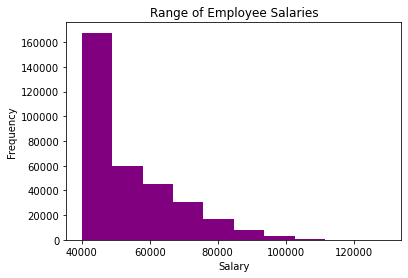

In [45]:
# Create a histogram to visualize the most common salary ranges for employees
salaries = salary_data['salary']
salary_hist = salaries.plot.hist(bins = 10, title = "Range of Employee Salaries", color = 'purple')
salary_hist.set_xlabel("Salary")

#Save figure
employee_salary_fig = salary_hist.get_figure()
employee_salary_fig.savefig("Salary-Histogram.png")

## The common salary ranges for employee's is heavily skewed. The typical range is around 40 to 50k

In [46]:
# Create a bar chart of average salary by title
# Creat group by function for title/salary
# Grab mean for average
AVG_Salary_title = pd.DataFrame(salary_data.groupby('title')['salary'].mean())
AVG_Salary_title = AVG_Salary_title.sort_values('salary',ascending=True)
AVG_Salary_title

,salary
title,
Senior Engineer,48505.714313
Engineer,48533.339845
Technique Leader,48574.320997
Assistant Engineer,48615.074794
Manager,51531.041667
Staff,58460.049489
Senior Staff,58557.394072


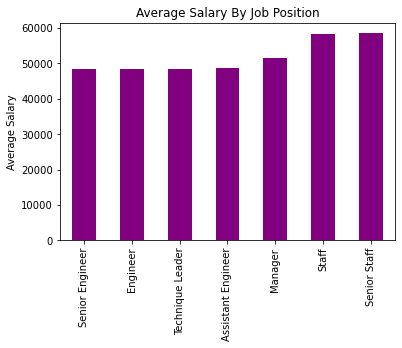

In [58]:
# create the bar chart for avg salary by title

avg_salary_bar = AVG_Salary_title.plot.bar(title = 'Average Salary By Job Position',legend=False, color = 'purple')
avg_salary_bar.set_xlabel("")
avg_salary_bar.set_ylabel("Average Salary")

# Save barchart
avg_salary_bar_fig = avg_salary_bar.get_figure()
avg_salary_bar_fig.savefig("Avgerage Salary by title.png")

## Histrogram shows that staff and senior staff have a higher average salary compared to the other job positions